In [57]:
#import Libraries
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as smf
import statsmodels.formula.api as sm
import warnings
warnings.filterwarnings('ignore')

In [58]:
# import data set
df=pd.read_csv('/content/delivery_time.csv')
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [59]:
# Apply EDA  & Data Visualization
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [61]:
#Renaming columns
df1 = df.rename({'Delivery Time':'Delivery_Time','Sorting Time':'Sorting_Time'}, axis = 1)
df1

,Delivery_Time,Sorting_Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [66]:
#data type
df1.dtypes

Delivery_Time    float64
Sorting_Time       int64
dtype: object

In [67]:
df1.describe()

,Delivery_Time,Sorting_Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [68]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery_Time  21 non-null     float64
 1   Sorting_Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [69]:
df1.isnull().sum()

Delivery_Time    0
Sorting_Time     0
dtype: int64

In [70]:
df1[df1.duplicated()].shape

(0, 2)

Text(0.5, 1.0, 'Delivery_Time')

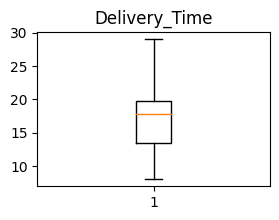

In [72]:
#plotting outliers
plt.subplots(figsize=(3,2))
plt.boxplot(df1['Delivery_Time'])
plt.title('Delivery_Time')

Text(0.5, 1.0, 'Sorting_Time')

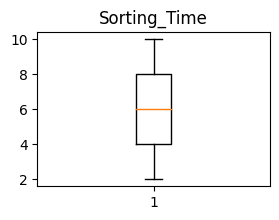

In [73]:
#plotting outliers
plt.subplots(figsize=(3,2))
plt.boxplot(df1['Sorting_Time'])
plt.title('Sorting_Time')

In [13]:
#there are  no outliers in the data

In [74]:
df1.corr() 

,Delivery_Time,Sorting_Time
Delivery_Time,1.000000,0.825997
Sorting_Time,0.825997,1.000000


In [75]:
#Visualization of Correlation between X & Y
#Regplot= regression plot

<Axes: xlabel='Sorting Time', ylabel='Delivery Time'>

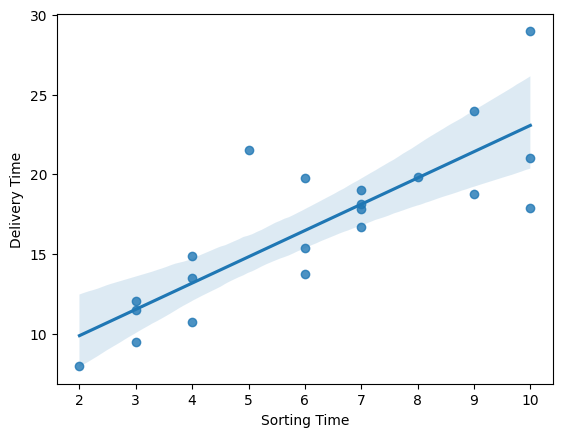

In [80]:
sns.regplot(x=df['Sorting Time'],y=df['Delivery Time'])  

In [81]:
#There is good correlation between the 2 variables
# score is more than 0.8 which is good

Trying different Transformation of data to estimate normal distribution & to remove any skewness

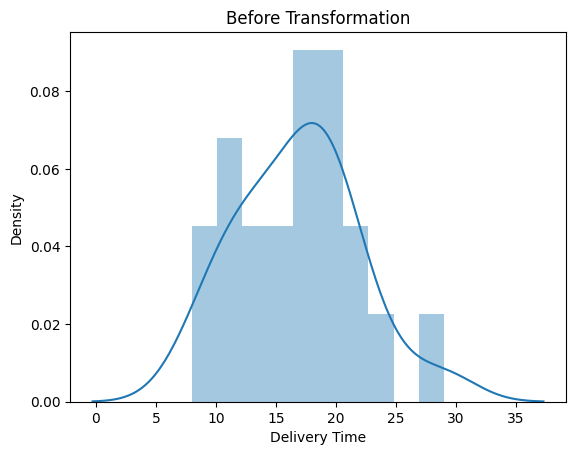

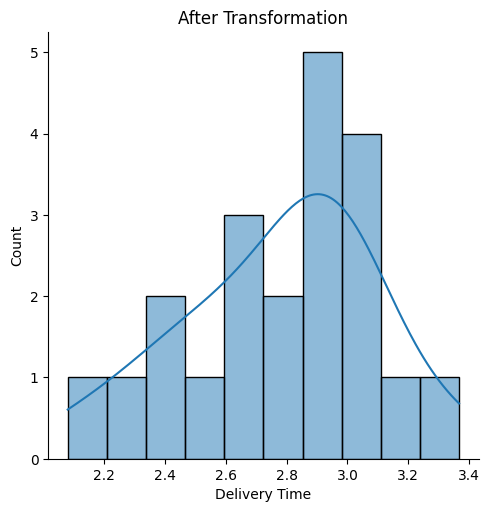

In [82]:
sns.distplot(df['Delivery Time'], bins = 10, kde = True)
plt.title('Before Transformation')
sns.displot(np.log(df['Delivery Time']), bins = 10, kde = True)
plt.title('After Transformation')
plt.show()

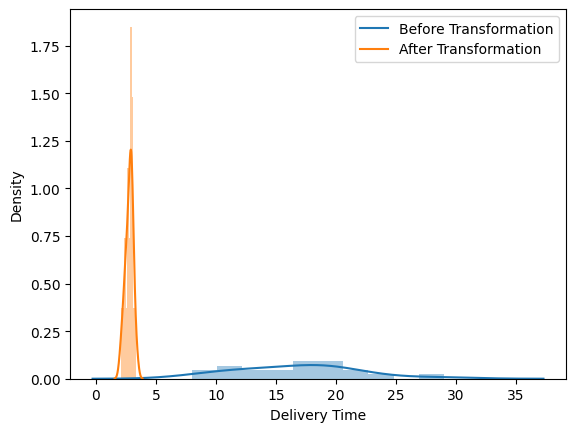

In [83]:
labels = ['Before Transformation','After Transformation']
sns.distplot(df['Delivery Time'], bins = 10, kde = True)
sns.distplot(np.log(df['Delivery Time']), bins = 10, kde = True)
plt.legend(labels)
plt.show()

Text(0.5, 1.0, 'Cube root transformation')

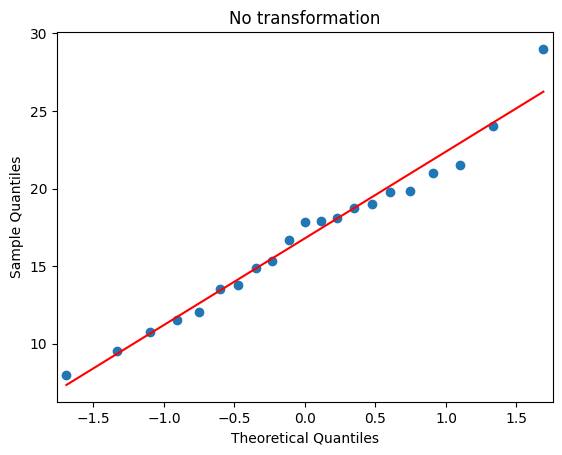

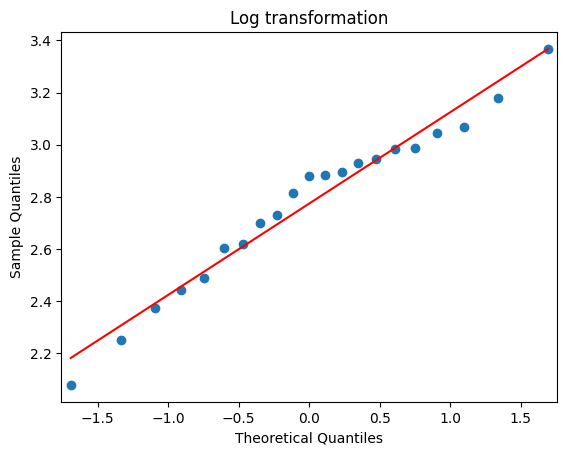

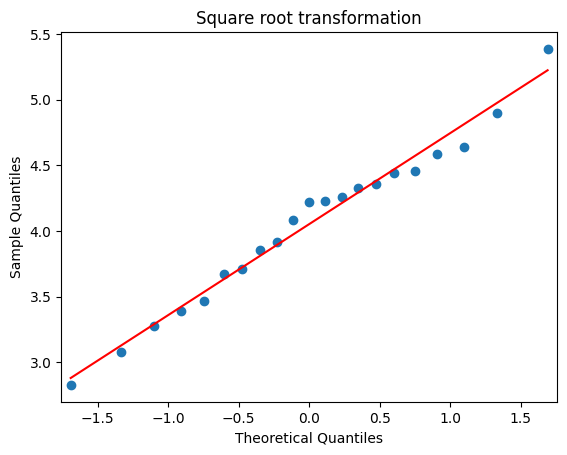

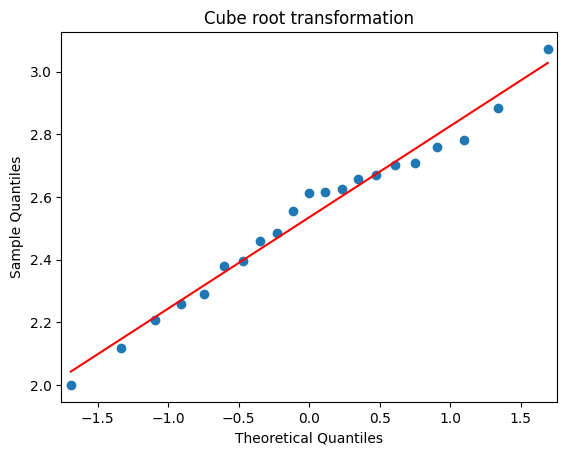

In [84]:
smf.qqplot(df['Delivery Time'], line = 'r')
plt.title('No transformation')
smf.qqplot(np.log(df['Delivery Time']), line = 'r')
plt.title('Log transformation')
smf.qqplot(np.sqrt(df['Delivery Time']), line = 'r')
plt.title('Square root transformation')
smf.qqplot(np.cbrt(df['Delivery Time']), line = 'r')
plt.title('Cube root transformation')

<Axes: xlabel='Sorting Time', ylabel='Density'>

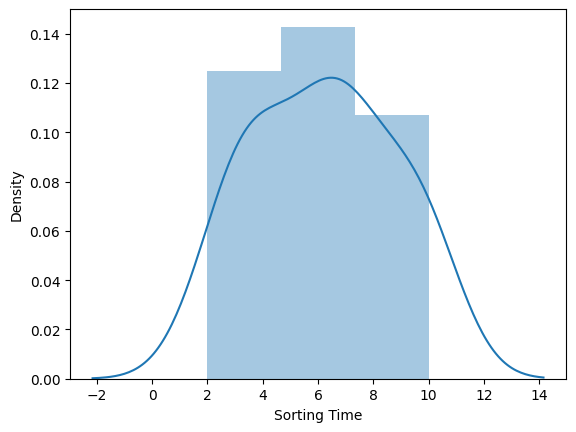

In [85]:
sns.distplot(df['Sorting Time'])

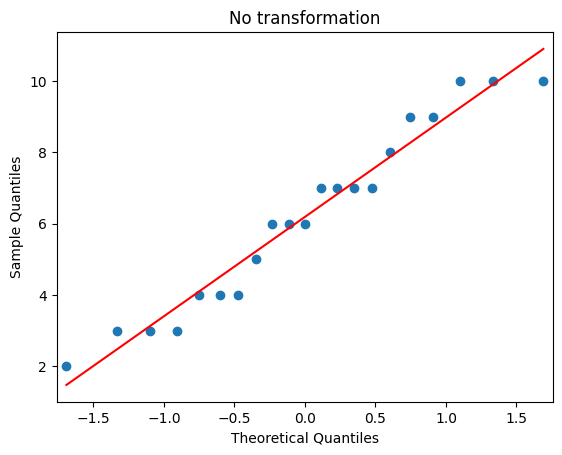

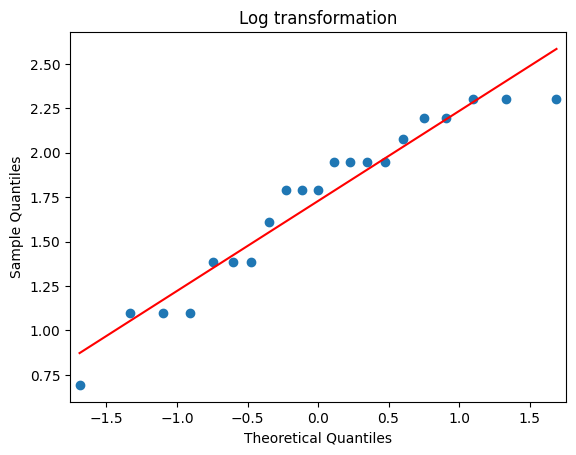

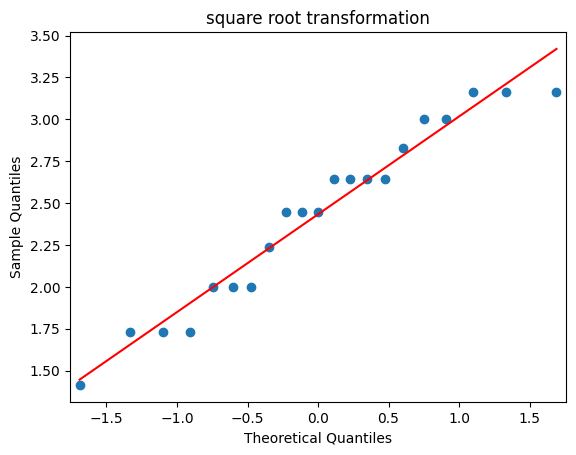

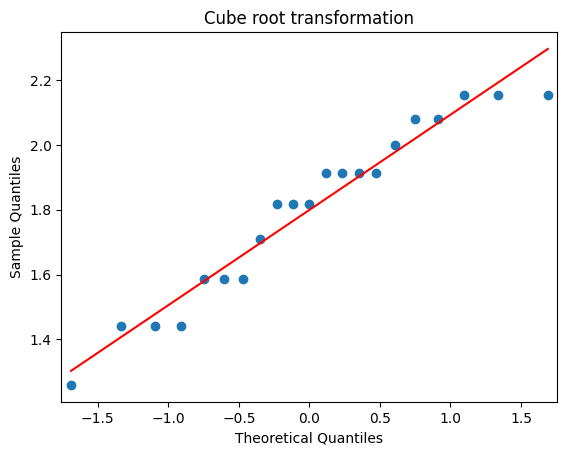

In [86]:
smf.qqplot(df['Sorting Time'], line = 'r')
plt.title('No transformation')
smf.qqplot(np.log(df['Sorting Time']), line = 'r')
plt.title('Log transformation')
smf.qqplot(np.sqrt(df['Sorting Time']), line = 'r')
plt.title('square root transformation')
smf.qqplot(np.cbrt(df['Sorting Time']), line = 'r')
plt.title('Cube root transformation')
plt.show()

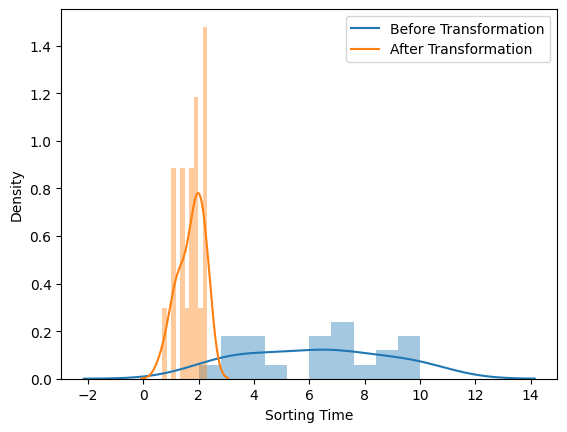

In [87]:
labels = ['Before Transformation','After Transformation']
sns.distplot(df['Sorting Time'], bins = 10, kde = True)
sns.distplot(np.log(df['Sorting Time']), bins = 10, kde = True)
plt.legend(labels)
plt.show()

fitting Linear Regression Model

In [88]:
import statsmodels.formula.api as smf  #model-regression model

model = sm.ols('Delivery_Time~Sorting_Time', data = df1).fit() #ols-ordinary least square,y Des.variable-sunday


In [89]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Delivery_Time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Fri, 21 Apr 2023   Prob (F-statistic):           3.98e-06
Time:                        10:44:11   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
Sorting_Time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [90]:
#find coeffiecient B0 & B1
model.params
#Regression eqn: delivery_time=B0+B1*sorting_time where B0=6.58,B1=1.649
#delivery_time=6.58+1.649*sorting_time

Intercept       6.582734
Sorting_Time    1.649020
dtype: float64

In [91]:
delivery_time=6.58+1.649*6 
delivery_time

16.474

In [92]:
#Finding Rsquared value
model.rsquared,model.rsquared_adj #R square values-0.68 it means okay regression eqn

(0.6822714748417231, 0.6655489208860244)

<Axes: xlabel='Sorting_Time', ylabel='Delivery_Time'>

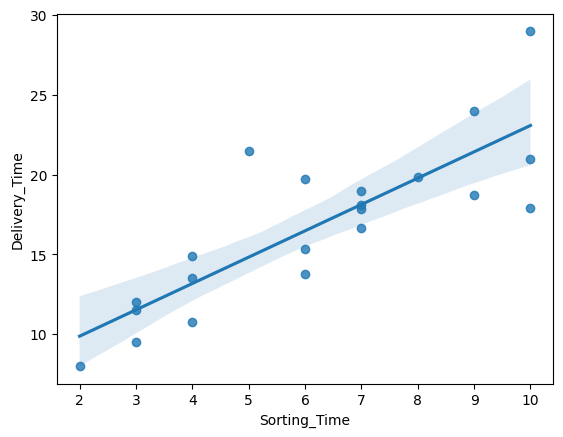

In [94]:
sns.regplot(x=df1['Sorting_Time'],y=df1['Delivery_Time'])

Model Prediction


In [97]:
#manual prediction for sorting time 6
Delivery_Time=6.58+1.649*6 
Delivery_Time

16.474

In [98]:
#automatic prediction for sorting time 6,!0
newdata=pd.Series([6,10])
newdata

0     6
1    10
dtype: int64

In [103]:
df1_pred=pd.DataFrame(newdata,columns=['Sorting_Time'])
df1_pred

,Sorting_Time
0,6
1,10


In [104]:
model.predict(df1_pred)

0    16.476853
1    23.072933
dtype: float64